In [39]:
import os
from utils import read_accs_from_folder
from utils import plot_acc_merged

ROOT = "./result-adaxeval"
model_name = "llm-jp-3-13b-exp1-multi-en"
model_name = "llm-jp-3-13b-exp2-multi"
model_name = "llm-jp-3-13b-exp3-medical-en_jstage"
model_name = "llm-jp-3-13b-exp1-multi-ja"
model_name = "llm-jp-3-13b-exp1-multi-en_jstage"
# model_name = "llm-jp-3-13b-exp7-mono-syntax32"

template = "prompt"
num_shot = 0

result_dir = os.path.join(ROOT, f"{model_name}_{template}_{str(num_shot)}-shot")

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

def plot_acc_merged(df):
    # Create the line plot
    plt.figure(figsize=(5.5, 2.8), constrained_layout=True)
    sns.lineplot(
        data=df, x='iter_num', y='acc', 
        hue='label', markers=True, marker='o', linewidth=2,
        palette={'Memorization': '#F9A037', 'Intralingual': '#3D7AB3', 'Interlingual': '#6AB187'}
    )

    plt.axvline(x=3841, color='red', linestyle='dotted', label='1st Epoch')
    # plt.axvline(x=15327, color='red', linestyle='dotted', label='4th Epoch')

    legend_fontsize = 11
    # plt.title(title)
    plt.xlabel("Iterations", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.grid(True)
    
    
    # Custom separate legends
    handles, labels = plt.gca().get_legend_handles_labels()

    # Separate handles/labels
    handles, labels = plt.gca().get_legend_handles_labels()
    handle_dict = dict(zip(labels, handles))  # map correct handle to its label
    task_order = ["Memorization", "Intralingual", "Interlingual"]
    task_handles = [handle_dict[l] for l in task_order]
    task_labels = task_order
    
    epoch_handles = handles[-1:]
    epoch_labels = labels[-1:]
    
    # First legend for tasks
    legend1 = plt.legend(
        task_handles, task_labels,
        loc='center left', bbox_to_anchor=(1, 0.6),
        ncol=1, fontsize=legend_fontsize)
    plt.gca().add_artist(legend1)  # Keep the first legend
    # legend2 = plt.legend(
    #     eval_handles, eval_labels, 
    #     loc='center left',  bbox_to_anchor=(1.02, 0.3), fontsize=12, title=None)
    
    def thousands_formatter(x, pos):
        if x == 0: return '0'
        else:
            return f'{int(x / 1000)}K'

    plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.gca().add_artist(legend1)  # Keep the first legend
    # plt.gca().add_artist(legend2)  # Keep the second legend
    
    legend2 = plt.legend(
        epoch_handles, epoch_labels, 
        loc='center left', bbox_to_anchor=(1, 0.3), fontsize=legend_fontsize)
    plt.ylim(0.25, 0.8)
    plt.tight_layout()
    # plt.subplots_adjust(left=0.05)
    # plt.subplots_adjust(right=0.2)
    # plt.show()
    result_dir = "./figures"
    plt.savefig(
        os.path.join(result_dir, f"{model_name}_{template}_{str(num_shot)}-shot.pdf"), 
        dpi=300, bbox_inches="tight", bbox_extra_artists=(legend1, legend2))


In [41]:
is_ood = False
delta_acc = False
df = read_accs_from_folder(result_dir, model_name, is_ood=is_ood, delta_acc=delta_acc)

/tmp/ipykernel_637337/3771238821.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf["label"] = np.select(conditions, choices, default="Other")
/tmp/ipykernel_637337/4049446609.py:63: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


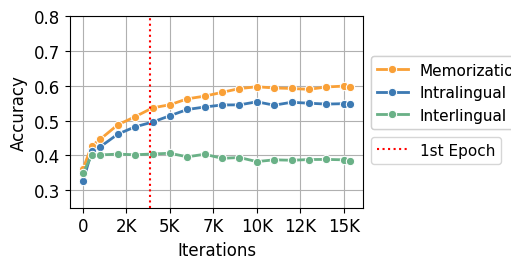

In [42]:

if "ja" in model_name:
    source_lang, target_lang = "ja", "en"
else:
    source_lang, target_lang = "en", "ja"
sdf = df[~((df["eval_lang"] == target_lang) & (df["eval_type"] == "mem"))]

import numpy as np

conditions = [
    (sdf["eval_lang"] == source_lang) & (sdf["eval_type"] == "mem"),
    (sdf["eval_lang"] == source_lang) & (sdf["eval_type"] == "gen"),
    (sdf["eval_lang"] == target_lang) & (sdf["eval_type"] == "gen"),
]
choices = ["Memorization", "Intralingual", "Interlingual"]
sdf["label"] = np.select(conditions, choices, default="Other")

plot_acc_merged(sdf)